## LINEAR REGRESSION ASSIGNMENT

#### Problem Statement:

- A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

- They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the datset

In [1]:
import pandas as pd
import numpy as np

In [2]:
auto_df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
auto_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
auto_df.shape

(205, 26)

In [5]:
auto_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#sns.pairplot(auto_df)
#plt.show()

 If we look at the pair plot for price we see some of the variables having linear relationship with price
and thus Linear regression can be applied

In [9]:
auto_df['CarName'] = auto_df['CarName'].str.split(" ", n = 1, expand = True)

auto_df['CarName'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

In [10]:
auto_df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
maxda           2
renault         2
vw              2
porcshce        1
vokswagen       1
toyouta         1
mercury         1
Nissan          1
Name: CarName, dtype: int64

In [11]:
# Create a dictionary to find and replace values
dic_to_replace = {"CarName": {"toyouta": 'toyota', "porcshce": 'porsche',"vokswagen": 'volkswagen',"mazda": 'maxda',"vw": 'volkswagen'}}
auto_df.replace(dic_to_replace, inplace=True)
# View first few rows of data
auto_df['CarName'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarName, dtype: object

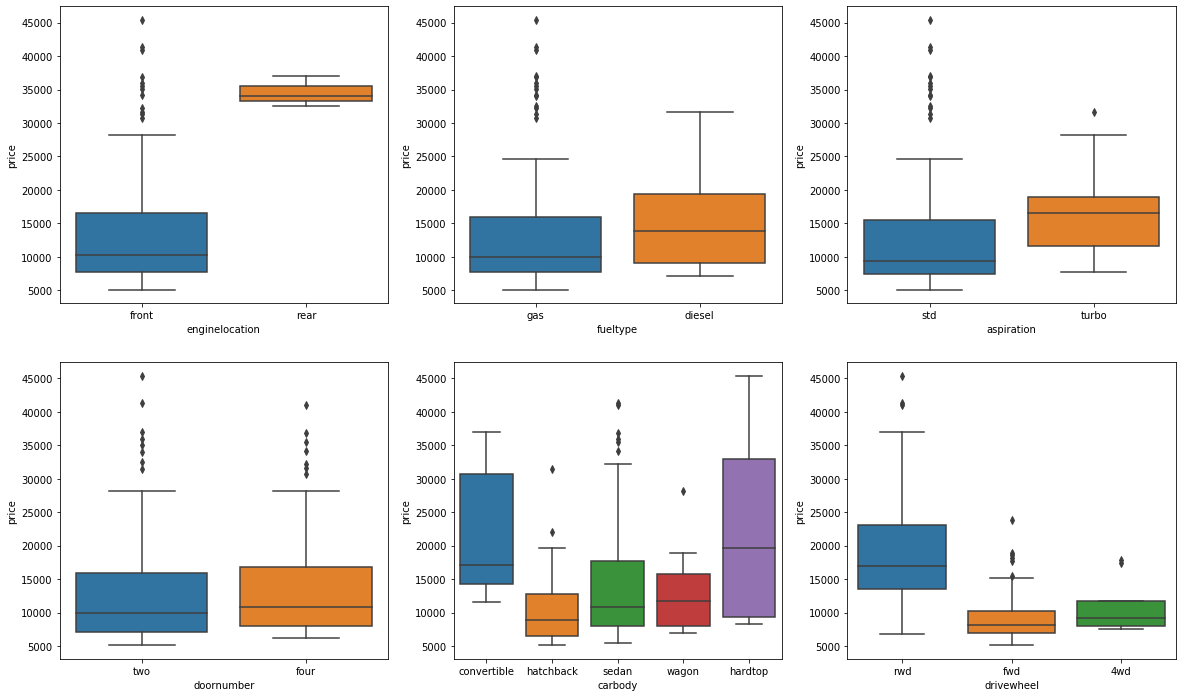

In [12]:
categorical_col = ['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem']

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = auto_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = auto_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = auto_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = auto_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = auto_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto_df)
plt.show()

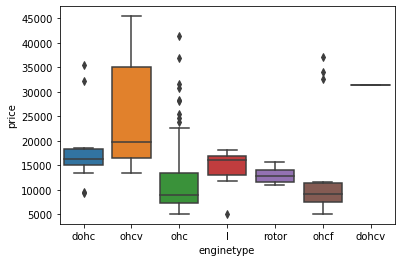

In [13]:
sns.boxplot(x = 'enginetype', y = 'price', data = auto_df)

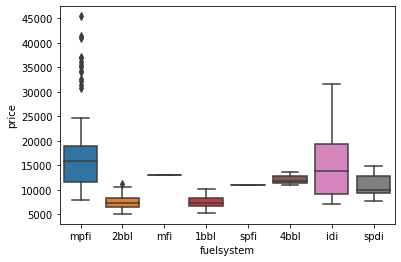

In [14]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto_df)

In [15]:
print(auto_df['symboling'].value_counts())


print(auto_df['compressionratio'].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
9.20      8
8.00      8
7.00      7
21.00     5
7.50      5
9.60      5
23.00     5
8.40      5
8.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.31      1
21.90     1
22.00     1
11.50     1
9.41      1
10.10     1
9.10      1
22.70     1
7.80      1
Name: compressionratio, dtype: int64


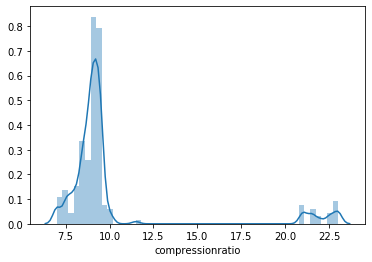

In [16]:
sns.distplot(auto_df['compressionratio'])

In [17]:
auto_df['compressionratio'].describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

In [18]:
#Ceiled Compression ratio to common categories due to varied values
auto_df["compressionratio"] = np.ceil(auto_df["compressionratio"] / 9.0) 

In [19]:
auto_df["compressionratio"].value_counts()

1.0    114
2.0     71
3.0     20
Name: compressionratio, dtype: int64

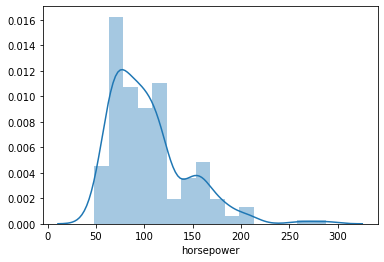

In [20]:
sns.distplot(auto_df['horsepower'])

In [21]:
auto_df = auto_df.drop(columns = ['car_ID'])

In [22]:
auto_df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Step 3: Data Preparation

In [23]:
df_car_mod = auto_df.select_dtypes(include=['object'])

df_car_mod.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [24]:
df_car_mod.isnull().sum()

CarName           0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64

In [25]:
df_car_mod['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [26]:
df_car_mod = pd.get_dummies(df_car_mod, columns=['fueltype'], drop_first=True)

In [27]:
df_car_mod.sample(10)

,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,fueltype_gas
185,volkswagen,std,four,sedan,fwd,front,ohc,four,mpfi,1
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,1
140,subaru,std,two,hatchback,4wd,front,ohcf,four,2bbl,1
145,subaru,turbo,four,sedan,4wd,front,ohcf,four,mpfi,1
24,dodge,std,four,hatchback,fwd,front,ohc,four,2bbl,1
188,volkswagen,std,four,sedan,fwd,front,ohc,four,mpfi,1
124,plymouth,turbo,two,hatchback,rwd,front,ohc,four,spdi,1
105,nissan,turbo,two,hatchback,rwd,front,ohcv,six,mpfi,1
80,mitsubishi,turbo,two,hatchback,fwd,front,ohc,four,spdi,1
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,1


In [28]:
df_car_mod['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [29]:
df_car_mod['doornumber'] = df_car_mod['doornumber'].replace('four', 4)
df_car_mod['doornumber'] = df_car_mod['doornumber'].replace('two', 2)

In [30]:
df_car_mod['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [32]:
df_car_mod['CarName_encoded'] = labelencoder.fit_transform(df_car_mod['CarName'])

df_car_mod[['CarName', 'CarName_encoded']].sample(20)

,CarName,CarName_encoded
110,peugeot,14
42,honda,7
142,subaru,19
118,plymouth,15
3,audi,2
148,subaru,19
124,plymouth,15
161,toyota,20
41,honda,7
172,toyota,20


In [33]:
df_car_mod['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [34]:
# Create a dictionary to find and replace values
dic_to_replace = {"cylindernumber": {"four": 4, "two": 2,"six": 6,"five": 5,"eight": 8,"twelve":12,"three": 3}}
df_car_mod.replace(dic_to_replace, inplace=True)
# View first few rows of data
df_car_mod['cylindernumber'].head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

In [35]:
df_car_mod.head()

,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,fueltype_gas,CarName_encoded
0,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,1,1
1,alfa-romero,std,2,convertible,rwd,front,dohc,4,mpfi,1,1
2,alfa-romero,std,2,hatchback,rwd,front,ohcv,6,mpfi,1,1
3,audi,std,4,sedan,fwd,front,ohc,4,mpfi,1,2
4,audi,std,4,sedan,4wd,front,ohc,5,mpfi,1,2


In [36]:
# Enoding make column using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
make_encoded_results = labelbinarizer.fit_transform(df_car_mod['CarName'])

In [37]:
labelbinarizer.classes_

array(['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='<U11')

In [38]:
df_make_encoded = pd.DataFrame(make_encoded_results, columns=labelbinarizer.classes_)

In [39]:
df_make_encoded.sample(10)

,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ctransformer = ColumnTransformer([("encoded_data", OneHotEncoder(sparse=False), [4,5]),])
ct_encoded_results = ctransformer.fit_transform(df_car_mod)
# Get Feature Names of Encoded columns
ctransformer.get_feature_names()

['encoded_data__x0_4wd',
 'encoded_data__x0_fwd',
 'encoded_data__x0_rwd',
 'encoded_data__x1_front',
 'encoded_data__x1_rear']

In [41]:
df_ct_encoded_data = pd.DataFrame(ct_encoded_results, columns=ctransformer.get_feature_names())

In [42]:
df_ct_encoded_data.head()

,encoded_data__x0_4wd,encoded_data__x0_fwd,encoded_data__x0_rwd,encoded_data__x1_front,encoded_data__x1_rear
0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0


In [43]:
# Dropping dummy variables to avoid multicollinearity
df_ct_encoded_data.drop(['encoded_data__x0_4wd', 'encoded_data__x1_front'], inplace=True, axis=1)
# Viewing few rows of data after dropping dummy varibles
df_ct_encoded_data.head()

,encoded_data__x0_fwd,encoded_data__x0_rwd,encoded_data__x1_rear
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


In [44]:
df = pd.concat([df_car_mod.reset_index(drop=True), df_ct_encoded_data.reset_index(drop=True)], axis=1)


df.drop(['drivewheel', 'enginelocation', 'CarName'], inplace=True, axis=1)

df.head()



,aspiration,doornumber,carbody,enginetype,cylindernumber,fuelsystem,fueltype_gas,CarName_encoded,encoded_data__x0_fwd,encoded_data__x0_rwd,encoded_data__x1_rear
0,std,2,convertible,dohc,4,mpfi,1,1,0.0,1.0,0.0
1,std,2,convertible,dohc,4,mpfi,1,1,0.0,1.0,0.0
2,std,2,hatchback,ohcv,6,mpfi,1,1,0.0,1.0,0.0
3,std,4,sedan,ohc,4,mpfi,1,2,1.0,0.0,0.0
4,std,4,sedan,ohc,5,mpfi,1,2,0.0,0.0,0.0


In [45]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
df['aspiration'] = lenc.fit_transform(df['aspiration'])
# Classes in the encoded data
lenc.classes_

array(['std', 'turbo'], dtype=object)

In [46]:
# Encoding using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe_results = ohe.fit_transform(df[['aspiration']])
# Converting OneHotEncoded results into an dataframe
df_ohe_results = pd.DataFrame(ohe_results, columns=lenc.classes_)
# Viewing first few rows of data
df_ohe_results.head()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,std,turbo
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [47]:
categorical_cols = df.columns[df.dtypes==object].tolist()
categorical_cols

['carbody', 'enginetype', 'fuelsystem']

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
# Viewing first few rows of data
df[categorical_cols].head(10)

,carbody,enginetype,fuelsystem
0,0,0,5
1,0,0,5
2,2,5,5
3,3,3,5
4,3,3,5
5,3,3,5
6,3,3,5
7,4,3,5
8,3,3,5
9,2,3,5


In [49]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False)
onehotencoder.fit_transform(df[categorical_cols])

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [50]:
df.head()

,aspiration,doornumber,carbody,enginetype,cylindernumber,fuelsystem,fueltype_gas,CarName_encoded,encoded_data__x0_fwd,encoded_data__x0_rwd,encoded_data__x1_rear
0,0,2,0,0,4,5,1,1,0.0,1.0,0.0
1,0,2,0,0,4,5,1,1,0.0,1.0,0.0
2,0,2,2,5,6,5,1,1,0.0,1.0,0.0
3,0,4,3,3,4,5,1,2,1.0,0.0,0.0
4,0,4,3,3,5,5,1,2,0.0,0.0,0.0


In [51]:
auto_df.drop(['fueltype', 'aspiration', 'doornumber','carbody','enginetype','cylindernumber','fuelsystem','drivewheel', 'enginelocation', 'CarName'], inplace=True, axis=1)

df_auto = pd.concat([auto_df, df],axis=1)

df_auto.drop([], inplace=True, axis=1)





df_auto.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,doornumber,carbody,enginetype,cylindernumber,fuelsystem,fueltype_gas,CarName_encoded,encoded_data__x0_fwd,encoded_data__x0_rwd,encoded_data__x1_rear
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,1.0,...,2,0,0,4,5,1,1,0.0,1.0,0.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,1.0,...,2,0,0,4,5,1,1,0.0,1.0,0.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,1.0,...,2,2,5,6,5,1,1,0.0,1.0,0.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,2.0,...,4,3,3,4,5,1,2,1.0,0.0,0.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,1.0,...,4,3,3,5,5,1,2,0.0,0.0,0.0


In [52]:
categorical_cols = df_auto.columns[df_auto.dtypes==object].tolist()
categorical_cols

[]

In [53]:
df_auto.shape

(205, 26)

In [54]:
df_auto.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'aspiration',
       'doornumber', 'carbody', 'enginetype', 'cylindernumber', 'fuelsystem',
       'fueltype_gas', 'CarName_encoded', 'encoded_data__x0_fwd',
       'encoded_data__x0_rwd', 'encoded_data__x1_rear'],
      dtype='object')

In [55]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_auto, train_size = 0.8, test_size = 0.2, random_state = 100)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
df_auto.head(1).transpose()

,0
symboling,3.00
wheelbase,88.60
carlength,168.80
carwidth,64.10
carheight,48.80
curbweight,2548.00
enginesize,130.00
boreratio,3.47
stroke,2.68
compressionratio,1.00


In [59]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'aspiration',
       'doornumber', 'carbody', 'enginetype', 'cylindernumber', 'fuelsystem',
       'fueltype_gas', 'CarName_encoded', 'encoded_data__x0_fwd',
       'encoded_data__x0_rwd', 'encoded_data__x1_rear']

col = df_train.columns

df_train = df_train.reindex(columns=col)

#df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [60]:
df_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'aspiration',
       'doornumber', 'carbody', 'enginetype', 'cylindernumber', 'fuelsystem',
       'fueltype_gas', 'CarName_encoded', 'encoded_data__x0_fwd',
       'encoded_data__x0_rwd', 'encoded_data__x1_rear'],
      dtype='object')

In [61]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [62]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,164.0,6.498866e-17,1.003063,-2.350915,-0.692635,0.136505,0.965645,1.794784
wheelbase,164.0,8.827627e-16,1.003063,-2.052510,-0.670588,-0.320735,0.361480,3.020367
carlength,164.0,8.854706e-16,1.003063,-2.638444,-0.558965,-0.088607,0.482837,2.436474
carwidth,164.0,3.206107e-15,1.003063,-2.534274,-0.815873,-0.165667,0.345210,3.038920
carheight,164.0,5.903137e-16,1.003063,-2.353544,-0.688431,0.042594,0.773619,2.519956
curbweight,164.0,6.092687e-17,1.003063,-1.975977,-0.748127,-0.251025,0.615778,2.981578
enginesize,164.0,-8.055887e-17,1.003063,-1.592652,-0.677784,-0.347414,0.345090,5.141797
boreratio,164.0,2.186598e-16,1.003063,-2.410258,-0.965769,-0.106885,0.947202,2.508811
stroke,164.0,-6.234850e-16,1.003063,-3.541749,-0.506366,0.087513,0.483432,2.990922
compressionratio,164.0,-3.384826e-18,1.003063,-0.813622,-0.813622,-0.813622,0.668978,2.151579


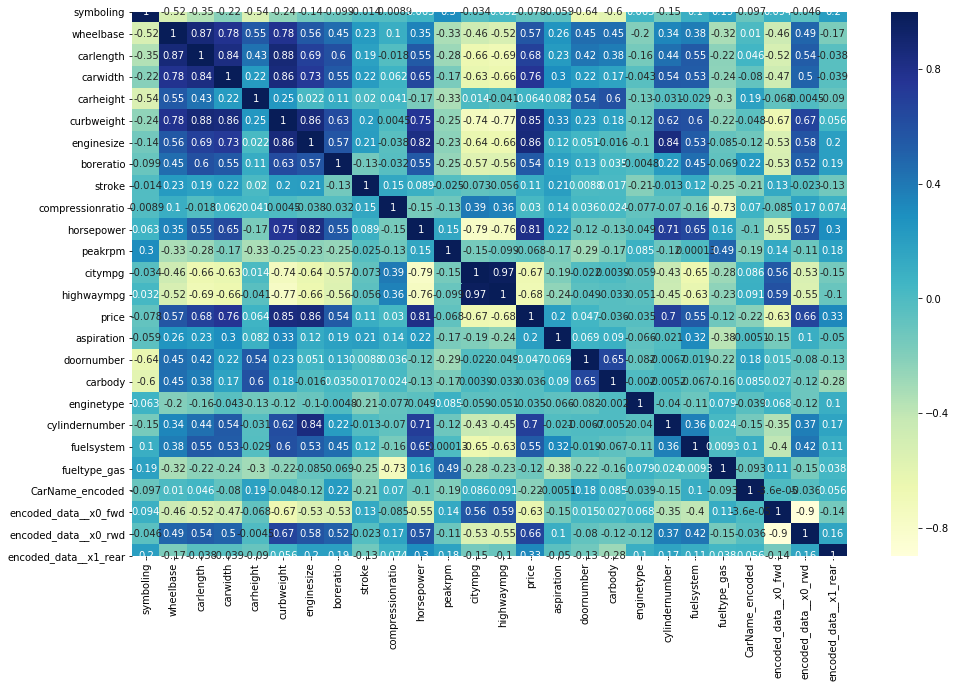

In [63]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [64]:
corr_matrix = df_train.corr()
corr_matrix["price"].sort_values(ascending=False)

price                    1.000000
enginesize               0.863011
curbweight               0.845345
horsepower               0.812608
carwidth                 0.762071
cylindernumber           0.698362
carlength                0.684234
encoded_data__x0_rwd     0.664165
wheelbase                0.569241
fuelsystem               0.546865
boreratio                0.544209
encoded_data__x1_rear    0.329895
aspiration               0.197039
stroke                   0.108640
carheight                0.064143
doornumber               0.046687
compressionratio         0.030093
enginetype              -0.034910
carbody                 -0.036243
peakrpm                 -0.068469
symboling               -0.078469
fueltype_gas            -0.122847
CarName_encoded         -0.218665
encoded_data__x0_fwd    -0.626380
citympg                 -0.672783
highwaympg              -0.679994
Name: price, dtype: float64

In [65]:
y_train = df_train.pop('price')
X_train = df_train

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 11),
 ('wheelbase', False, 10),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', False, 5),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 12),
 ('horsepower', True, 1),
 ('peakrpm', False, 4),
 ('citympg', False, 14),
 ('highwaympg', False, 6),
 ('aspiration', False, 16),
 ('doornumber', False, 8),
 ('carbody', False, 7),
 ('enginetype', False, 9),
 ('cylindernumber', True, 1),
 ('fuelsystem', False, 13),
 ('fueltype_gas', False, 2),
 ('CarName_encoded', True, 1),
 ('encoded_data__x0_fwd', False, 3),
 ('encoded_data__x0_rwd', True, 1),
 ('encoded_data__x1_rear', True, 1)]

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'cylindernumber', 'CarName_encoded',
       'encoded_data__x0_rwd', 'encoded_data__x1_rear'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'curbweight', 'compressionratio',
       'peakrpm', 'citympg', 'highwaympg', 'aspiration', 'doornumber',
       'carbody', 'enginetype', 'fuelsystem', 'fueltype_gas',
       'encoded_data__x0_fwd'],
      dtype='object')

In [71]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [72]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [74]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     125.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.66e-68
Time:                        13:58:25   Log-Likelihood:                -50.574
No. Observations:                 164   AIC:                             123.1
Df Residuals:                     153   BIC:                             157.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.245e-

In [75]:
#X_train_new = X_train_rfe.drop(["highwaympg"], axis = 1)

In [76]:
#import statsmodels.api as sm  
#X_train_lm = sm.add_constant(X_train_new)

In [77]:
#lm = sm.OLS(y_train,X_train_lm).fit() 

In [78]:
#print(lm.summary())

In [79]:
#X_train_new.columns

In [80]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,27.06
6,cylindernumber,16.16
3,boreratio,6.93
5,horsepower,4.63
4,stroke,3.27
0,carwidth,3.09
8,encoded_data__x0_rwd,1.97
1,carheight,1.38
9,encoded_data__x1_rear,1.30
7,CarName_encoded,1.28


In [82]:
X_train_new = X_train_rfe.drop(["enginesize"], axis = 1)

X_train_new.columns

Index(['carwidth', 'carheight', 'boreratio', 'stroke', 'horsepower',
       'cylindernumber', 'CarName_encoded', 'encoded_data__x0_rwd',
       'encoded_data__x1_rear'],
      dtype='object')

In [83]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     118.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.22e-64
Time:                        13:58:25   Log-Likelihood:                -62.795
No. Observations:                 164   AIC:                             145.6
Df Residuals:                     154   BIC:                             176.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.245e-

In [84]:
X_train_new.columns

Index(['carwidth', 'carheight', 'boreratio', 'stroke', 'horsepower',
       'cylindernumber', 'CarName_encoded', 'encoded_data__x0_rwd',
       'encoded_data__x1_rear'],
      dtype='object')

In [85]:
#X_train_new = X_train_new.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,horsepower,4.63
0,carwidth,3.09
5,cylindernumber,2.63
2,boreratio,2.48
7,encoded_data__x0_rwd,1.68
1,carheight,1.38
3,stroke,1.30
8,encoded_data__x1_rear,1.27
6,CarName_encoded,1.22


In [86]:
X_train_new_s = X_train_new.drop(["stroke"], axis = 1)

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_s)

lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.57e-65
Time:                        13:58:25   Log-Likelihood:                -63.258
No. Observations:                 164   AIC:                             144.5
Df Residuals:                     155   BIC:                             172.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.245e-

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_s
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,horsepower,4.43
0,carwidth,2.82
4,cylindernumber,2.41
2,boreratio,2.24
6,encoded_data__x0_rwd,1.67
1,carheight,1.38
7,encoded_data__x1_rear,1.27
5,CarName_encoded,1.20


In [88]:
X_train_new_b = X_train_new_s.drop(["boreratio"], axis = 1)

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_b)

lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.54e-66
Time:                        13:58:25   Log-Likelihood:                -64.854
No. Observations:                 164   AIC:                             145.7
Df Residuals:                     156   BIC:                             170.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.245e-

In [89]:
#X_train_new_b = X_train_new_b.drop(['const'], axis=1)
X_train_new_b.shape

(164, 7)

In [90]:
X_train_new_b.columns

Index(['carwidth', 'carheight', 'horsepower', 'cylindernumber',
       'CarName_encoded', 'encoded_data__x0_rwd', 'encoded_data__x1_rear'],
      dtype='object')

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_b
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,horsepower,3.90
0,carwidth,2.57
3,cylindernumber,2.12
5,encoded_data__x0_rwd,1.57
1,carheight,1.37
6,encoded_data__x1_rear,1.26
4,CarName_encoded,1.08


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [92]:
y_train_price = lm.predict(X_train_lm)

In [93]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

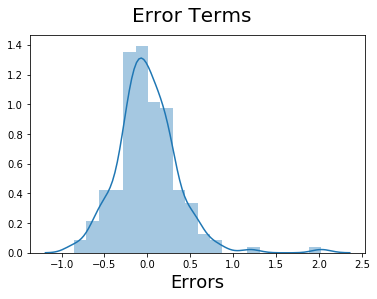

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [95]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'aspiration',
       'doornumber', 'carbody', 'enginetype', 'cylindernumber', 'fuelsystem',
       'fueltype_gas', 'CarName_encoded', 'encoded_data__x0_fwd',
       'encoded_data__x0_rwd', 'encoded_data__x1_rear']


df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.columns

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'aspiration',
       'doornumber', 'carbody', 'enginetype', 'cylindernumber', 'fuelsystem',
       'fueltype_gas', 'CarName_encoded', 'encoded_data__x0_fwd',
       'encoded_data__x0_rwd', 'encoded_data__x1_rear'],
      dtype='object')

In [96]:
y_test = df_test.pop('price')
X_test = df_test

In [97]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_b.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

X_test_new.columns

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Index(['const', 'carwidth', 'carheight', 'horsepower', 'cylindernumber',
       'CarName_encoded', 'encoded_data__x0_rwd', 'encoded_data__x1_rear'],
      dtype='object')

In [98]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

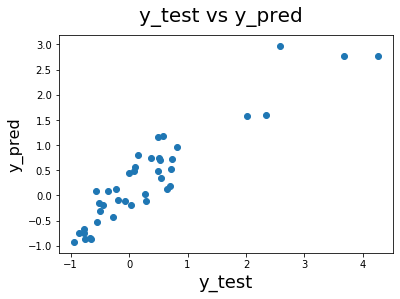

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8504422041702862